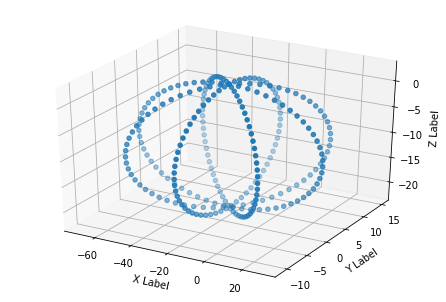

Offset x =  -20.0
Offset y =  2.0
Offset z =  -10.0
Amplitude x =  50.0
Amplitude y =  13.0
Amplitude z =  12.0
Noise measurement ongoing...
RMS Noise (1sigma) =  [0.26798024 0.30268201 0.28333859]
Done
Get ready...
3
2
1
GO!
Sample  1 / 10  =  [0.78456358 0.66627874 0.02712488]
Sample  2 / 10  =  [0.33968026 0.13534905 0.38642601]
Sample  3 / 10  =  [0.56223794 0.42170372 0.89099086]
Sample  4 / 10  =  [0.33861409 0.4500663  0.87780543]
Sample  5 / 10  =  [0.96507827 0.79580955 0.74820134]
Sample  6 / 10  =  [0.29514847 0.80144999 0.6935594 ]
Sample  7 / 10  =  [0.81309822 0.07280474 0.48792196]
Sample  8 / 10  =  [0.18762833 0.25610841 0.66138909]
Sample  9 / 10  =  [0.64547964 0.47887667 0.17594048]
Sample  10 / 10  =  [0.65216235 0.94903957 0.21907639]
Done


In [19]:
import numpy as np
import math
import scipy.optimize as optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

def calibrate3DSensorInUniformField(samples_x,samples_y,samples_z):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(samples_x, samples_y, samples_z)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    def residualfunc(params):
        return (x-params[0])**2/params[3]**2+(y-params[1])**2/params[4]**2+(z-params[2])**2/params[5]**2-1
    params=optimize.leastsq(residualfunc,[0,0,0,1,1,1])
    params=params[0]
    offsets=[params[0],params[1],params[2]]
    amplitudes=[params[3],params[4],params[5]]
    print("Offset x = ", offsets[0])
    print("Offset y = ", offsets[1])
    print("Offset z = ", offsets[2])
    print("Amplitude x = ", amplitudes[0])
    print("Amplitude y = ", amplitudes[1])
    print("Amplitude z = ", amplitudes[2])
    return offsets, amplitudes

def noiseRMSmeasure(gen_fun,Ts,n):
    print("Noise measurement ongoing...")
    time.sleep(1)
    samples=np.zeros((n,len(gen_fun())))
    for i in range(n):
        samples[i]=gen_fun()
        time.sleep(Ts)
    RMSnoise=np.std(samples,axis=0)
    print("RMS Noise (1sigma) = ",RMSnoise)
    print("Done")
    return RMSnoise
        
def getScatteredSamples(gen_fun,dist,n):
    print("Get ready...")
    print("3")
    time.sleep(1)
    print("2")
    time.sleep(1)
    print("1")
    time.sleep(1)
    print("GO!")
    samples=np.zeros((n,len(gen_fun())))
    i=0
    while i<n:
        new_sample=gen_fun()
        norms=np.linalg.norm(samples-new_sample,axis=1)
        if all(norms>dist):
            print("Sample ",i+1,"/",n," = ",new_sample)
            samples[i][:]=new_sample
            i=i+1
        time.sleep(0.01)
    print("Done")
    return samples
    

    
if __name__ == '__main__':
    #3D calibration
    theta=np.arange(0,2*math.pi,0.1)
    phi=np.arange(0,math.pi,math.pi/4)
    x0,y0,z0=-20, 2, -10
    a=50
    b=13
    c=12
    theta, phi = np.meshgrid(theta,phi)
    def ellipsoid(theta,phi,a,b,c):
        return a*np.multiply(np.sin(theta),np.cos(phi)), b*np.multiply(np.sin(theta),np.sin(phi)), c*np.cos(theta)
    x,y,z=ellipsoid(theta,phi,a,b,c)
    x=np.ndarray.flatten(x)+x0
    y=np.ndarray.flatten(y)+y0
    z=np.ndarray.flatten(z)+z0
    calibrate3DSensorInUniformField(x,y,z)
    
    #Noise measure
    from random import random
    def sample_generator():
        return np.array([random(), random(), random()])
    noiseRMSmeasure(sample_generator,0.001,100)
    
    #Scattered sampling
    getScatteredSamples(sample_generator,0.2,10)
    